# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [5]:
from helper import *
from time_analysis import *
import os
from __init__ import root_dir, data_path

# Data

In [6]:
%%capture
df = pd.read_csv(os.path.join(data_path,'clean.csv'), parse_dates=['Timestamp'])

FileNotFoundError: [Errno 2] No such file or directory: '/home/dimitris/Documents/github/EPF_ABA23/dataset_management/data/clean.csv'

In [19]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46313 entries, 0 to 46312
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Timestamp                       46313 non-null  datetime64[ns]
 1   DK_1_imports                    46313 non-null  float64       
 2   SE_4_imports                    46313 non-null  float64       
 3   DK_1_exports                    46313 non-null  float64       
 4   SE_4_exports                    46313 non-null  float64       
 5   Day_Ahead_price                 46313 non-null  float64       
 6   Forecasted_Load                 46313 non-null  float64       
 7   Actual_Load                     46313 non-null  float64       
 8   Solar_[MW]                      46313 non-null  float64       
 9   ttf_price                       46313 non-null  float64       
 10  coal_price                      46313 non-null  float64       
 11  co

Index(['Timestamp', 'DK_1_imports', 'SE_4_imports', 'DK_1_exports',
       'SE_4_exports', 'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load',
       'Solar_[MW]', 'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total'],
      dtype='object')

# Time series analysis

# Day ahead market price

In [ ]:
def timing2(df, column,lag):
    plot_n_scat(df[column])
    plot_hist(df[column])
    box(df,column)
    test_stationarity(df[column])
    acf_plot(df[column],lag)
    qqplot(df[column])
    testnormal(df[column])
    kpss_test(df[column])


timing2(df,'Day_Ahead_price',168)

# Wind load

# Actual Load

# Emissions

# Green energy mix

# TTF price

# Splitting

## Option 1 - sklearn function

In [3]:
tscv = TimeSeriesSplit(gap = 24*30*0, n_splits = 3, test_size = 24*30*3, max_train_size = df.shape[0])
# gap: observations between train and test set -> 0 months
# n_splits: # of folds
# test_size: observations for test set -> 3 months
print(tscv)

NameError: name 'df' is not defined

Fold 0:
  Train: index = [    0     1     2 ... 39830 39831 39832]
  Test:  index = [39833 39834 39835 ... 41990 41991 41992]


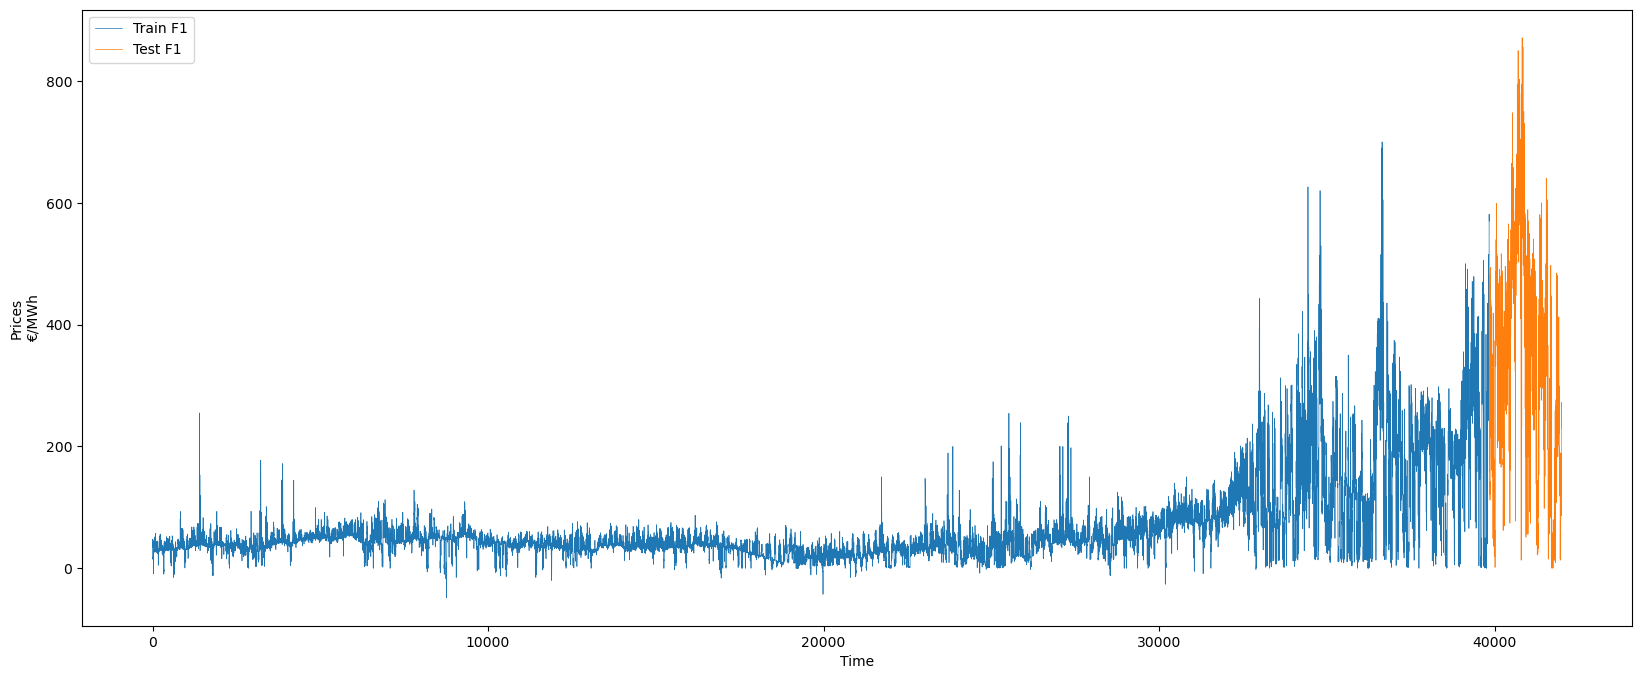

Fold 1:
  Train: index = [    0     1     2 ... 41990 41991 41992]
  Test:  index = [41993 41994 41995 ... 44150 44151 44152]


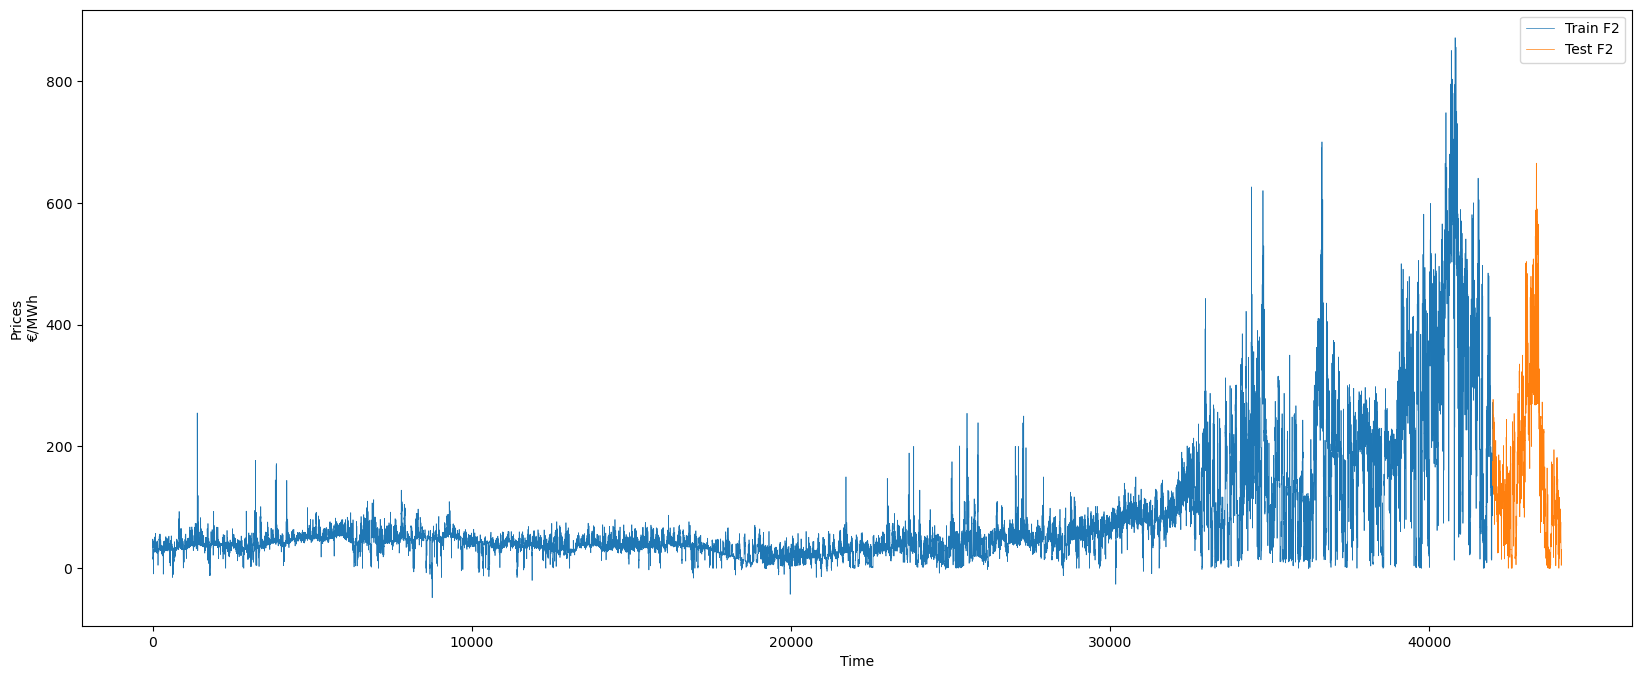

Fold 2:
  Train: index = [    0     1     2 ... 44150 44151 44152]
  Test:  index = [44153 44154 44155 ... 46310 46311 46312]


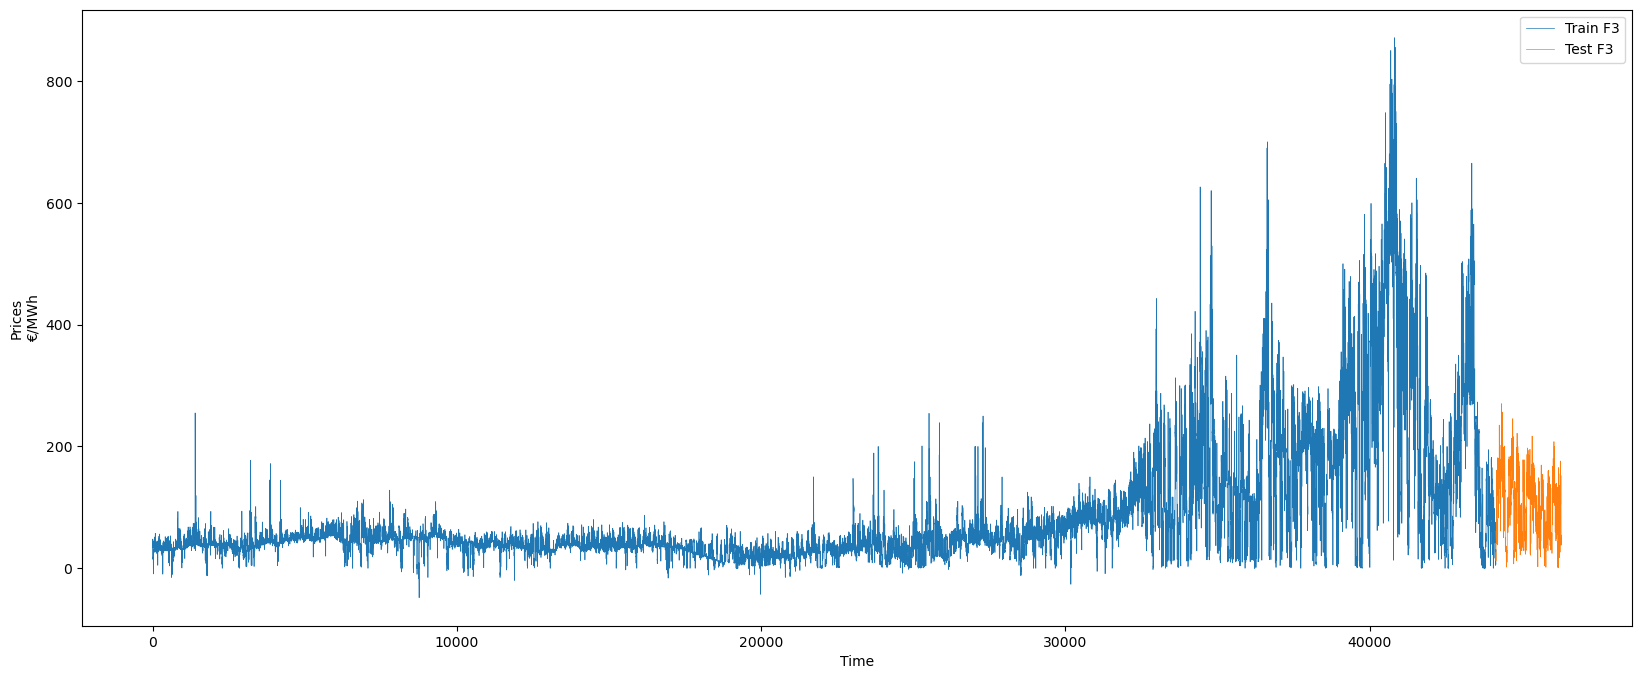

In [23]:
for i, (train_index, test_index) in enumerate(tscv.split(df['Timestamp'])):
    print(f"Fold {i}:")
    print(f"  Train: index = {train_index}")
    print(f"  Test:  index = {test_index}")
    
    X_train = df.iloc[train_index].copy()
    X_test = df.iloc[test_index].copy()
    
    plt.plot(X_train['Day_Ahead_price'], label = 'Train F'+str(i+1), linewidth = 0.5)
    plt.plot(X_test['Day_Ahead_price'], label = 'Test F'+str(i+1), linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Prices\n€/MWh')
    plt.legend()
    plt.show()


## Option 2 - manually

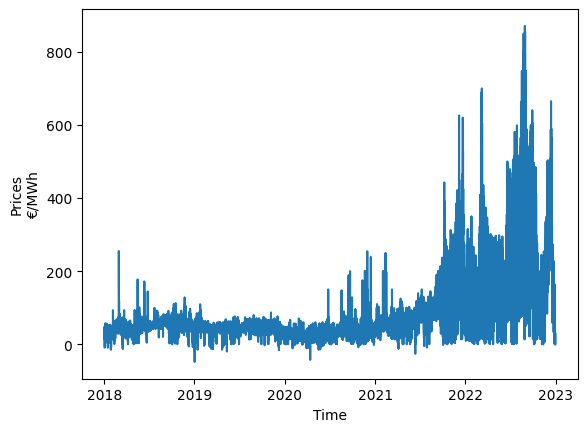

In [7]:
plt.plot(df['Timestamp'], df['Day_Ahead_price'])
plt.xlabel('Time')
plt.ylabel('Prices\n€/MWh')
plt.show()

Fold 1: train 01/01/2018 - 31/12/2020, test 01/01/2021 - 31/03/2021<br>
Fold 2: train 01/01/2018 - 30/06/2021, test 01/07/2021 - 30/09/2021<br>
Fold 3: train 01/01/2017 - 31/08/2022, test 01/09/2022 - 31/12/2022

In [8]:
train_start = ['2018-01-01', '2018-01-01', '2018-01-01']
train_end = ['2020-12-31', '2021-06-20', '2022-08-31']

test_start = ['2021-01-01', '2021-07-01', '2022-09-01']
test_end = ['2021-03-31', '2021-09-30', '2022-12-31']

In [9]:
df2 = df.set_index('Timestamp')

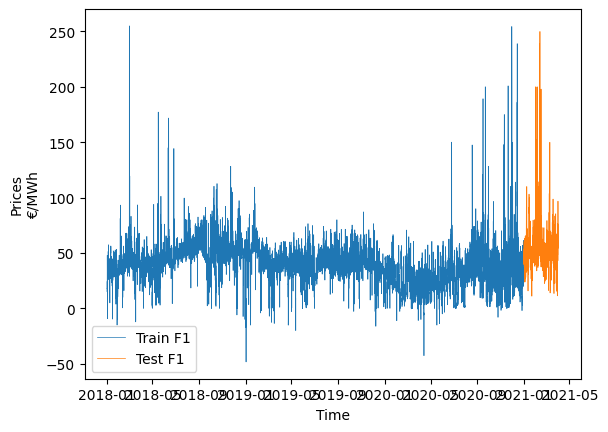

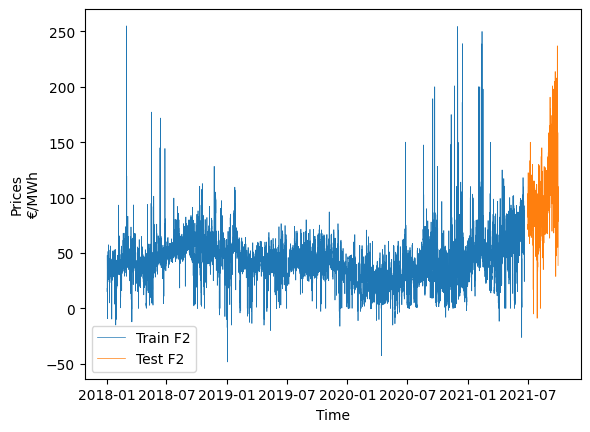

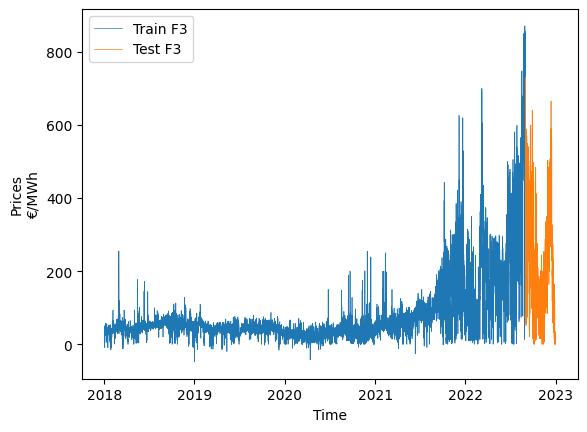

In [10]:
i = 1
for tr_s, tr_e, te_s, te_e in (zip(train_start, train_end, test_start, test_end)):
    
    X_train, X_test = split_timeseries(df2, tr_s, tr_e, te_s, te_e)
    
    plt.plot(X_train['Day_Ahead_price'], label = 'Train F'+str(i), linewidth = 0.5)
    plt.plot(X_test['Day_Ahead_price'], label = 'Test F'+str(i), linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Prices\n€/MWh')
    plt.legend()
    plt.show()
    
    i += 1